
### Price Prediction on Boston Dataset using Neural Networks 

### Reference :-

#### https://www.kaggle.com/ryanholbrook/mutual-information

#### sklearn.preprocessing.MinMaxScaler — scikit-learn 0.24.2 documentation

#### https://www.youtube.com/watch?v=2yhLEx2FKoY




In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

tf.__version__

'2.5.0'

In [5]:
# Load the drive helper and mount
from google.colab import drive

# Mounting the drive
drive.mount('/Deep_Learning')

Mounted at /Deep_Learning


In [6]:
# Load Data set

boston = load_boston()
df_X = pd.DataFrame(boston.data, columns = boston.feature_names)
df_Y = pd.DataFrame(boston.target)

In [7]:
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
df_Y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [9]:
df_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
df_Y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
# Checking for Null Values

df_X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
# Checking the datatypes

df_X.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

## Feature Selection

## Using 'Mutual Information Score' for 'Feature Utility Metric'

In [13]:
mi_score = mutual_info_regression(df_X, df_Y.values.ravel(), random_state = 32)

In [14]:
mi_score = pd.Series(mi_score, name="Mutual Information Scores", index=df_X.columns)
mi_score = mi_score.sort_values(ascending=False)

In [15]:
mi_score

LSTAT      0.670591
RM         0.527809
NOX        0.463388
INDUS      0.463303
PTRATIO    0.450704
TAX        0.367172
CRIM       0.351403
AGE        0.311233
DIS        0.295810
RAD        0.216865
ZN         0.207112
B          0.168397
CHAS       0.012498
Name: Mutual Information Scores, dtype: float64

### Selecting Top ten features based on 'Mutual Information Score' 

In [16]:
df_new_X = df_X[['LSTAT','RM','NOX','INDUS','PTRATIO','TAX','CRIM','AGE','DIS','RAD']]

In [17]:
df_new_X

,LSTAT,RM,NOX,INDUS,PTRATIO,TAX,CRIM,AGE,DIS,RAD
0,4.98,6.575,0.538,2.31,15.3,296.0,0.00632,65.2,4.0900,1.0
1,9.14,6.421,0.469,7.07,17.8,242.0,0.02731,78.9,4.9671,2.0
2,4.03,7.185,0.469,7.07,17.8,242.0,0.02729,61.1,4.9671,2.0
3,2.94,6.998,0.458,2.18,18.7,222.0,0.03237,45.8,6.0622,3.0
4,5.33,7.147,0.458,2.18,18.7,222.0,0.06905,54.2,6.0622,3.0
...,...,...,...,...,...,...,...,...,...,...
501,9.67,6.593,0.573,11.93,21.0,273.0,0.06263,69.1,2.4786,1.0
502,9.08,6.120,0.573,11.93,21.0,273.0,0.04527,76.7,2.2875,1.0
503,5.64,6.976,0.573,11.93,21.0,273.0,0.06076,91.0,2.1675,1.0
504,6.48,6.794,0.573,11.93,21.0,273.0,0.10959,89.3,2.3889,1.0


### Visualizing the selected features

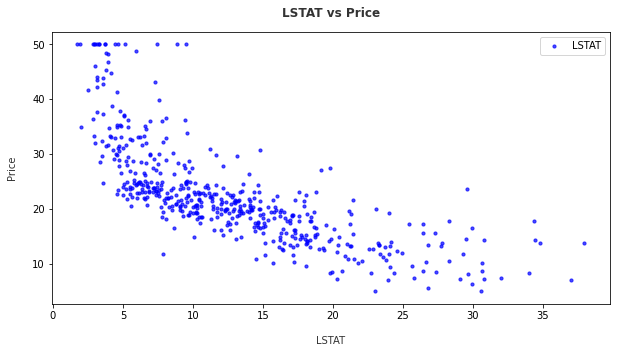

In [18]:
# Plotting LSTAT

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['LSTAT']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='LSTAT')
ax.set_title("LSTAT vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("LSTAT",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

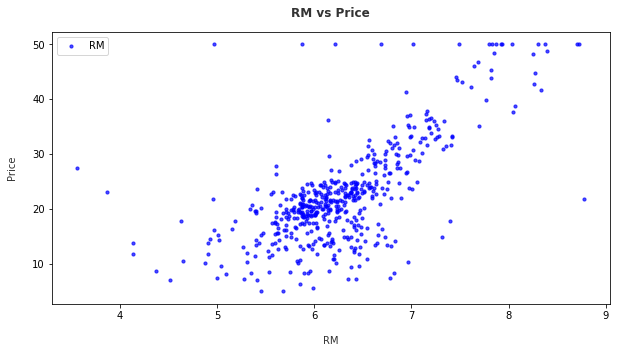

In [19]:
# Plotting RM

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['RM']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='RM')
ax.set_title("RM vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("RM",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

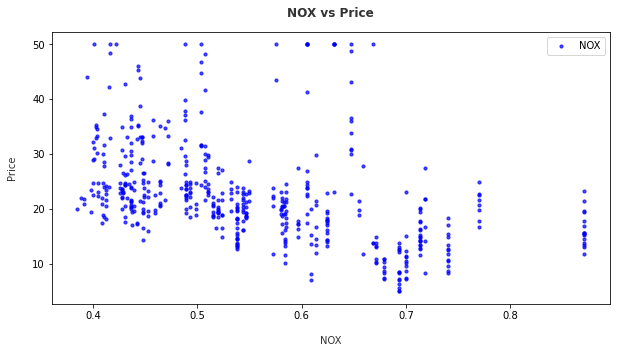

In [20]:
# Plotting NOX

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['NOX']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='NOX')
ax.set_title("NOX vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("NOX",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

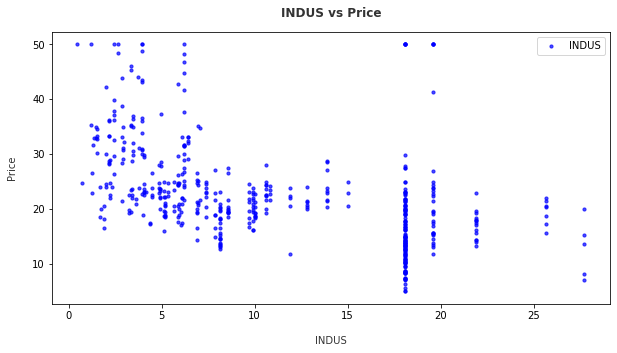

In [21]:
# Plotting NOX

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['INDUS']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='INDUS')
ax.set_title("INDUS vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("INDUS",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

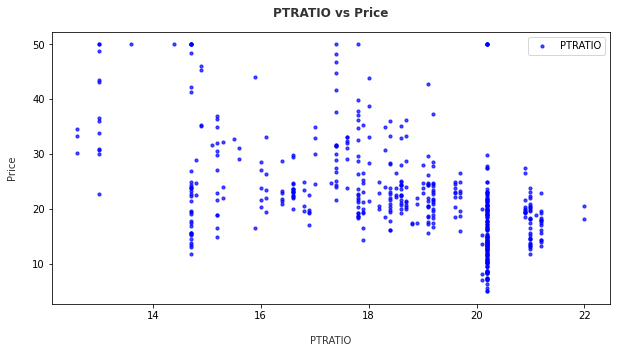

In [22]:
# Plotting PTRATIO

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['PTRATIO']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='PTRATIO')
ax.set_title("PTRATIO vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("PTRATIO",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

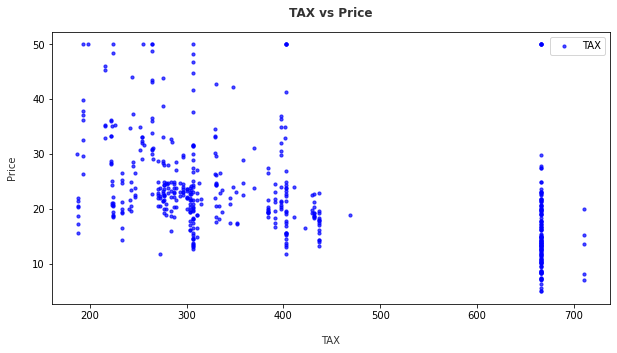

In [23]:
# Plotting TAX

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['TAX']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='TAX')
ax.set_title("TAX vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("TAX",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

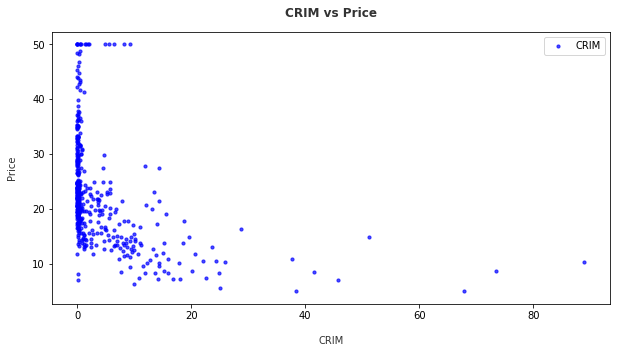

In [24]:
# Plotting CRIM

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['CRIM']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='CRIM')
ax.set_title("CRIM vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("CRIM",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

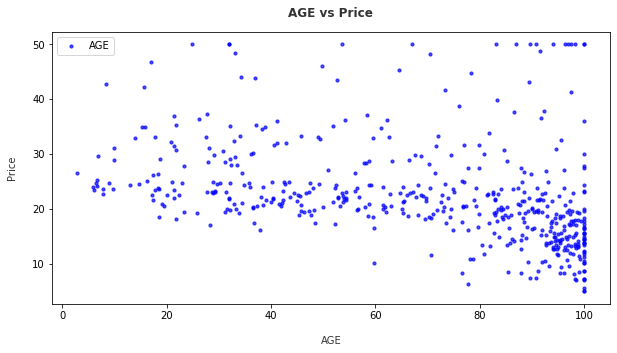

In [25]:
# Plotting AGE

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['AGE']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='AGE')
ax.set_title("AGE vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("AGE",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

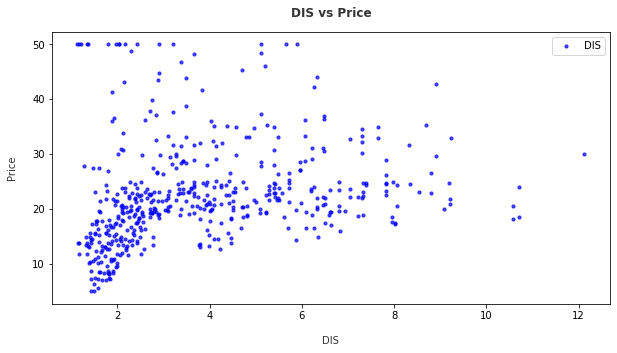

In [26]:
# Plotting DIS

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['DIS']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='DIS')
ax.set_title("DIS vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("DIS",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

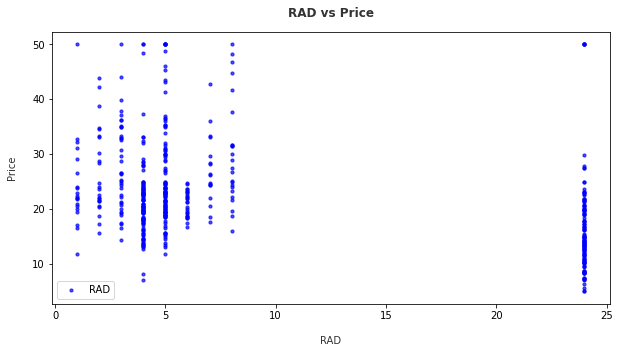

In [27]:
# Plotting RAD

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_new_X[['RAD']], df_Y[0], alpha=0.70, s=10, c='b', marker="o", label='RAD')
ax.set_title("RAD vs Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("RAD",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

### Splitting the dataset into Test and Training Set

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new_X, df_Y, test_size = 0.2, random_state = 32)

### Scaling the Features

In [121]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initializing the Artificial Neural Network

In [122]:
model = tf.keras.models.Sequential()


### Adding the layers in the Neural Network

In [123]:
# Adding the input layer

model.add(tf.keras.layers.Dense(input_dim= 10, units =7, activation ='relu'))

# Adding the second/hidden layer

model.add(tf.keras.layers.Dense(units=7, activation= 'relu'))

# Adding the output layer

model.add(tf.keras.layers.Dense(units=1, activation= 'linear'))



### Compiling the Neural Network

In [124]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])


In [125]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [126]:
history = model.fit(X_train_scaled, Y_train, batch_size = 32, epochs = 100)


Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 562.3537 - mae: 21.9685
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 553.2969 - mae: 21.7490
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 542.9289 - mae: 21.5049
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 531.5982 - mae: 21.2338
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 518.9356 - mae: 20.9216
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 504.4933 - mae: 20.5699
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 488.4709 - mae: 20.1844
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 470.5551 - mae: 19.7427
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 450.8125 - mae: 19.2456
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 429.6554 - mae: 18.7111
Epoch 11/100
13/13 [=========

### Plotting the Trainig Loss 

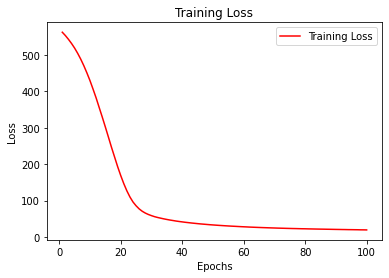

In [127]:
loss = history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Plotting the Mean Absolute Error

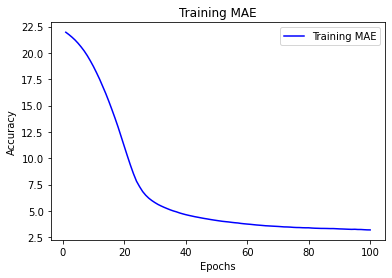

In [128]:
# Model 1

acc = history.history['mae']
epochs = range(1,len(loss)+1)
plt.plot(epochs, acc, 'b', label = 'Training MAE')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluating the Model

In [129]:
mse, mae = model.evaluate(X_test_scaled, Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 27.5534 - mae: 3.5088


In [130]:
print('Mean Squarred Error : ', mse)
print('Mean Absolute Error : ', mae)

Mean Squarred Error :  27.55344581604004
Mean Absolute Error :  3.5087900161743164


### Prediction

In [131]:
prediction = model.predict(X_test_scaled)


In [132]:
Y_test_a = Y_test.to_numpy()

In [133]:
result_array = np.concatenate((prediction, Y_test_a), axis=1)

In [134]:
Prediction_Result = pd.DataFrame(result_array, columns=['Predicted Price', 'Actual Price'])

In [135]:
Prediction_Result

,Predicted Price,Actual Price
0,15.418915,14.8
1,29.185406,28.6
2,11.762119,11.8
3,24.573555,20.9
4,15.858898,21.8
...,...,...
97,24.207916,24.2
98,15.632664,21.4
99,23.566402,21.9
100,15.631178,14.9


### Plotting Predicted vs Actual Price

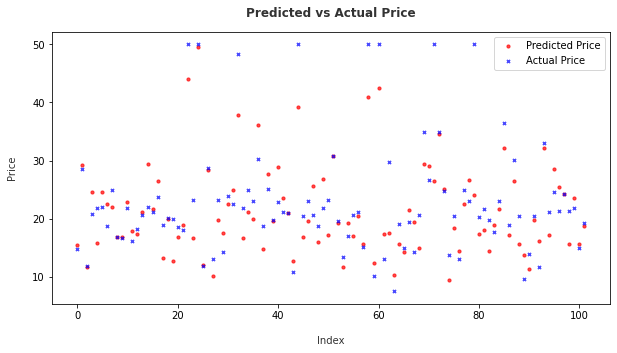

In [136]:
# Plotting Predicted vs Actual Price

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(Prediction_Result.index, Prediction_Result['Predicted Price'], alpha=0.70, s=10, c='r', marker="o", label='Predicted Price')
ax.scatter(Prediction_Result.index, Prediction_Result['Actual Price'], alpha=0.70, s=10, c='b', marker="x", label='Actual Price')
ax.set_title("Predicted vs Actual Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Index",labelpad=15, color='#333333')
ax.set_ylabel("Price",labelpad=15, color='#333333')
plt.legend()
plt.show()

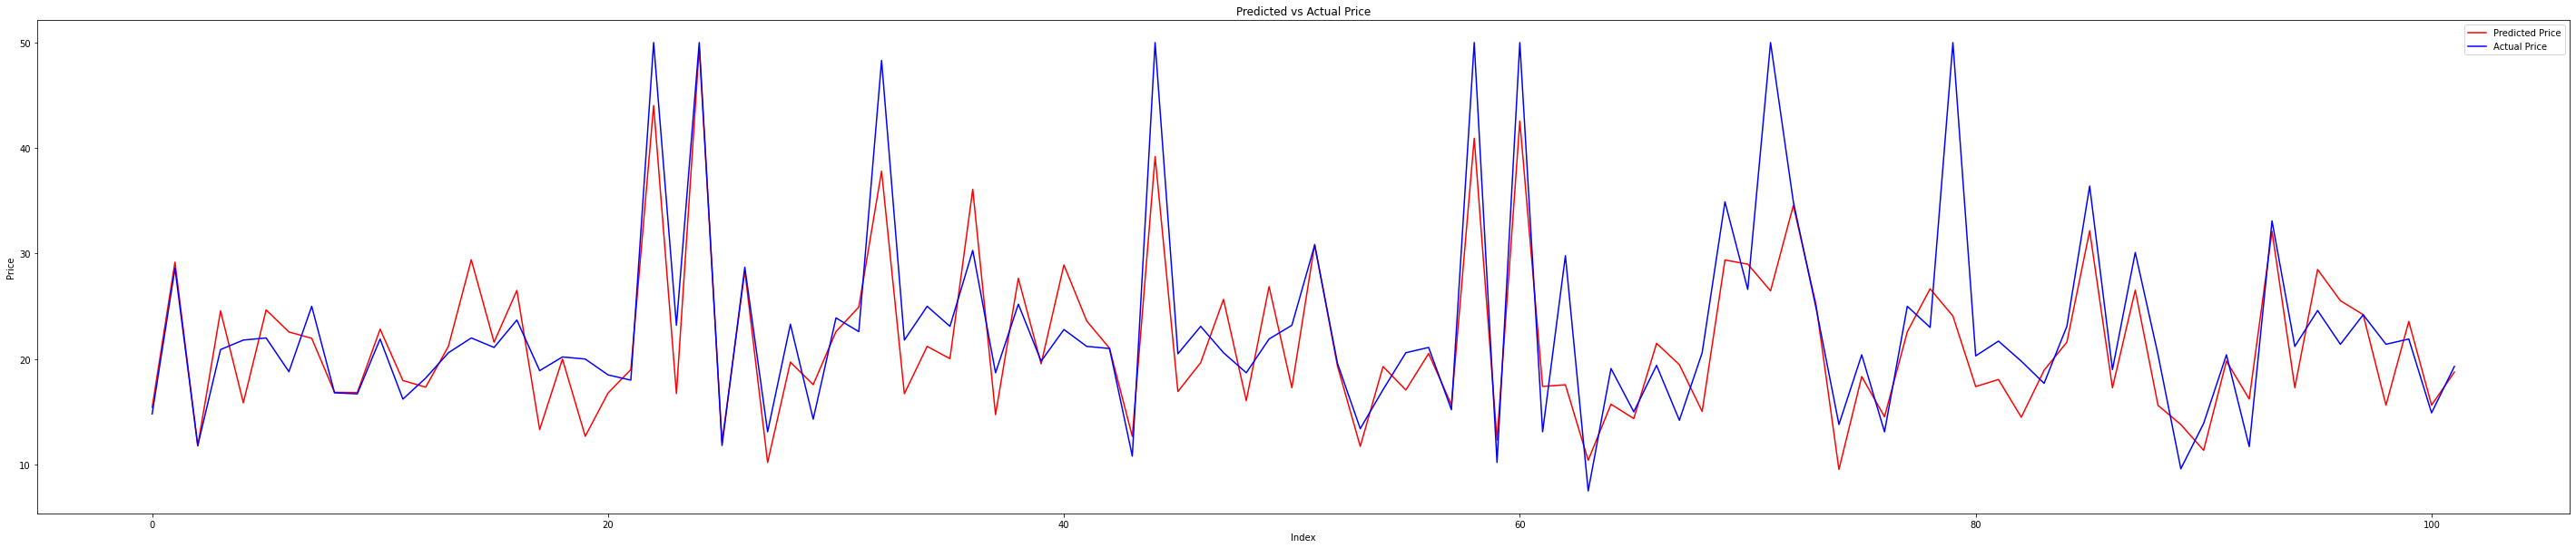

In [137]:
# Plotting a line graph - Predicted vs Actual

plt.subplots(figsize=(50,10)) 
plt.plot(Prediction_Result.index, Prediction_Result['Predicted Price'], c='r', label='Predicted Price')
plt.plot(Prediction_Result.index, Prediction_Result['Actual Price'], c='b', label='Actual Price' )
plt.title('Predicted vs Actual Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

## Summary

#### This exercise was performed using 'load_boston' dataset from sklearn library. The dataset contains 13 features and a target variable. In the first step, we checked the distribution of the data in the dataset. This includes checking the mean, standard deviation, min, max, count etc. Then we looked into data itself from a high level. Then we checked for null values and found that there was no null values. We also checked the datatypes of the features and found no categorical variables. Then we performed feature selection using the 'Mutual Information Score'. The top 10 features were used to  build the neural network. The scores were as following

LSTAT   -   0.670591,
RM      -   0.527809,
NOX     -   0.463388,
INDUS   -   0.463303,
PTRATIO -   0.450704,
TAX     -   0.367172,
CRIM    -   0.351403,
AGE     -   0.311233,
DIS     -   0.295810,
RAD     -   0.216865

#### Then we visualized the features using a scatter plot. The dataset was then split into train test set. Both the train and test set was scaled using Standard Scaler. A artificial neural netwrok was initialized and three layers were added. The first layer contained 10 dimensions, 7 neutrons and a RELU activation function. The hidden layer contains 7 neurons and a RELU activation function. The output layer contains 1 dimension and a linear activation function. The model was compiled using a Adam optimizer and 'Mean Squared Error' loss. The model was trained using the scaled traing data. The mean square error and mean absolute error were plotted during the training. It was observed that the model converged at around 25 epoch. The model was then used for prediction and the outcomes were visulalized using scatter plot and line graph.

## Accuracy -

#### Mean Squarred Error :  27.55344581604004
#### Mean Absolute Error :  3.5087900161743164


## Resulting Dataset - 


In [138]:
Prediction_Result

,Predicted Price,Actual Price
0,15.418915,14.8
1,29.185406,28.6
2,11.762119,11.8
3,24.573555,20.9
4,15.858898,21.8
...,...,...
97,24.207916,24.2
98,15.632664,21.4
99,23.566402,21.9
100,15.631178,14.9
